In [27]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tree import Tree
from nltk.stem import PorterStemmer

from LinkedIn_Operation_identification import findSynonyms

In [28]:
synJob = findSynonyms('jobs')
JobSyn = ['job']
for syn in synJob:
    if syn not in JobSyn:
        JobSyn.append(syn)

# print(JobSyn)

synOpen = findSynonyms('openings')
OpenSyn = ['opening']
for syn in synOpen:
    if syn not in OpenSyn:
        OpenSyn.append(syn)

# print(OpenSyn)

synPos = findSynonyms('position')
PosSyn = ['position']
for syn in synPos:
    if syn not in PosSyn:
        PosSyn.append(syn)

# print(PosSyn)

synPro = findSynonyms('profiles')
ProSyn = ['profiles']
for syn in synPro:
    if syn not in ProSyn:
        ProSyn.append(syn)

# print(synPro)

In [29]:
import os
os.environ["CORENLP_HOME"] = '/home/shreya\stanford-corenlp-full-2018-02-27'

from pycorenlp import StanfordCoreNLP
nlp = StanfordCoreNLP('http://localhost:9000/')

In [30]:
def stemming(text):
    ps = PorterStemmer()

    w = word_tokenize(text)
    tempword = ""
    for index, every in enumerate(w):
        tempword = tempword + (ps.stem(every))
        if (index != len(w) - 1):
            tempword = tempword + " "

    return tempword

In [35]:
text = ('sales jobs at LinkedIn')
# text = stemming(text)

output = nlp.annotate( text, properties = { 
    'annotators' : 'tokenize, ssplit, pos, depparse, parse',
    'outputFormat': 'json'})

In [36]:
depTreeStr = output['sentences'][0]['parse']
print(depTreeStr)

(ROOT
  (NP
    (NP (NNS sales))
    (NP
      (NP (NNS jobs))
      (PP (IN at)
        (NP (NNP LinkedIn))))))


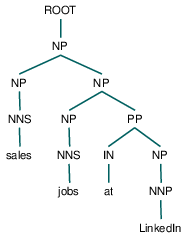

In [37]:
from nltk.tree import ParentedTree
ptree = ParentedTree.fromstring(depTreeStr)
ptree

In [38]:
leaf_values = ptree.leaves()

tree_location = []
flag = 0

syn = [OpenSyn, PosSyn, ProSyn, JobSyn]
for cur in syn:
    for word in cur:
        if word in leaf_values:
            leaf_index = leaf_values.index(word)
            tree_location = ptree.leaf_treeposition(leaf_index)
            print (tree_location)
            print (ptree[tree_location])
            flag = 1
            break
    if(flag == 1):
        break

(0, 1, 0, 0, 0)
jobs


(0, 1, 0)
['jobs']
jobs


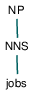

In [39]:
treeLoc = tree_location[:-2]
print(treeLoc)

subtree = ptree[treeLoc]
position = ""
if(treeLoc != []):

    childNodes = subtree.leaves()
    print(childNodes)

    position = (" ".join(childNodes))
    print(position)
    

subtree

In [40]:
position

'jobs'